In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
from datetime import datetime, timedelta

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
df_num = pd.read_csv(r"C:\Users\Renée García Mathieu\Desktop\Proyecto_Final\Transformed_Data\Merge_Data_Profit_VF", parse_dates=['sale_date'])
df_num.head(3)

,Sale_ID,Product_ID,Store_Country,Quantity_Sold,Discount_percent,sale_date,payment_method,customer_age,customer_gender,Membership,Product_Name,Category,Sale_Price_EUR,Cost_Price_EUR,Stock,Country_Origin,Brand,Color,Size,Gender,Gross_Sales,Total_Discount,Net_Sales,Total_Cost,Total_Profit_EUR,Profit_Percent
0,S000001,S001071,Australia,10,0.0,2023-05-24,Transfer,22,Not specified,No,T-shirt,Clothing,126.25,-79.54,327,EE.UU.,Nike,Red,XL,Male,1262.50,0.0,1262.50,-795.40,467.10,0.369980
1,S000002,S000592,Australia,4,0.0,2023-10-24,PayPal,23,Not specified,No,Sandals,Footwear,121.77,-68.19,117,Spain,Puma,Gray,M,Male,487.08,0.0,487.08,-272.76,214.32,0.440010
2,S000003,S001460,EE.UU.,9,0.0,2023-09-15,Cash,55,Male,No,Cap,Accessories,312.72,-212.65,53,EE.UU.,Under Armour,Black,M,Male,2814.48,0.0,2814.48,-1913.85,900.63,0.319999


In [4]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76578 entries, 0 to 76577
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Sale_ID           76578 non-null  object        
 1   Product_ID        76578 non-null  object        
 2   Store_Country     76578 non-null  object        
 3   Quantity_Sold     76578 non-null  int64         
 4   Discount_percent  76578 non-null  float64       
 5   sale_date         76578 non-null  datetime64[ns]
 6   payment_method    76578 non-null  object        
 7   customer_age      76578 non-null  int64         
 8   customer_gender   76578 non-null  object        
 9   Membership        76578 non-null  object        
 10  Product_Name      76578 non-null  object        
 11  Category          76578 non-null  object        
 12  Sale_Price_EUR    76578 non-null  float64       
 13  Cost_Price_EUR    76578 non-null  float64       
 14  Stock             7657

In [5]:
df_num.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity_Sold,76578.0,5.507887,1.0,3.0,6.0,8.0,10.0,2.876896
Discount_percent,76578.0,0.062793,0.0,0.0,0.0,0.15,0.25,0.087091
sale_date,76578,2024-01-13 21:34:25.000391936,2023-01-01 00:00:00,2023-07-16 00:00:00,2024-01-26 00:00:00,2024-07-12 00:00:00,2024-12-28 00:00:00,NaN
customer_age,76578.0,43.175599,16.0,29.0,43.0,57.0,70.0,15.860606
Sale_Price_EUR,76578.0,252.156959,10.07,122.84,254.71,374.48,499.87,142.74592
Cost_Price_EUR,76578.0,-164.480334,-394.83,-241.39,-161.01,-76.51,-5.84,97.509919
Stock,76578.0,254.018674,0.0,123.0,259.0,383.0,500.0,146.33226
Gross_Sales,76578.0,1388.419357,10.07,436.545,1059.45,2089.36,4998.7,1145.986725
Total_Discount,76578.0,15.805111,0.0,0.0,0.0,22.18225,124.9675,26.72883
Net_Sales,76578.0,1372.614246,7.7475,423.1305,1044.19,2067.978375,4998.5,1140.214194


In [6]:
columnas_num = df_num.select_dtypes(include=np.number).columns.tolist()
columnas_num

['Quantity_Sold',
 'Discount_percent',
 'customer_age',
 'Sale_Price_EUR',
 'Cost_Price_EUR',
 'Stock',
 'Gross_Sales',
 'Total_Discount',
 'Net_Sales',
 'Total_Cost',
 'Total_Profit_EUR',
 'Profit_Percent']

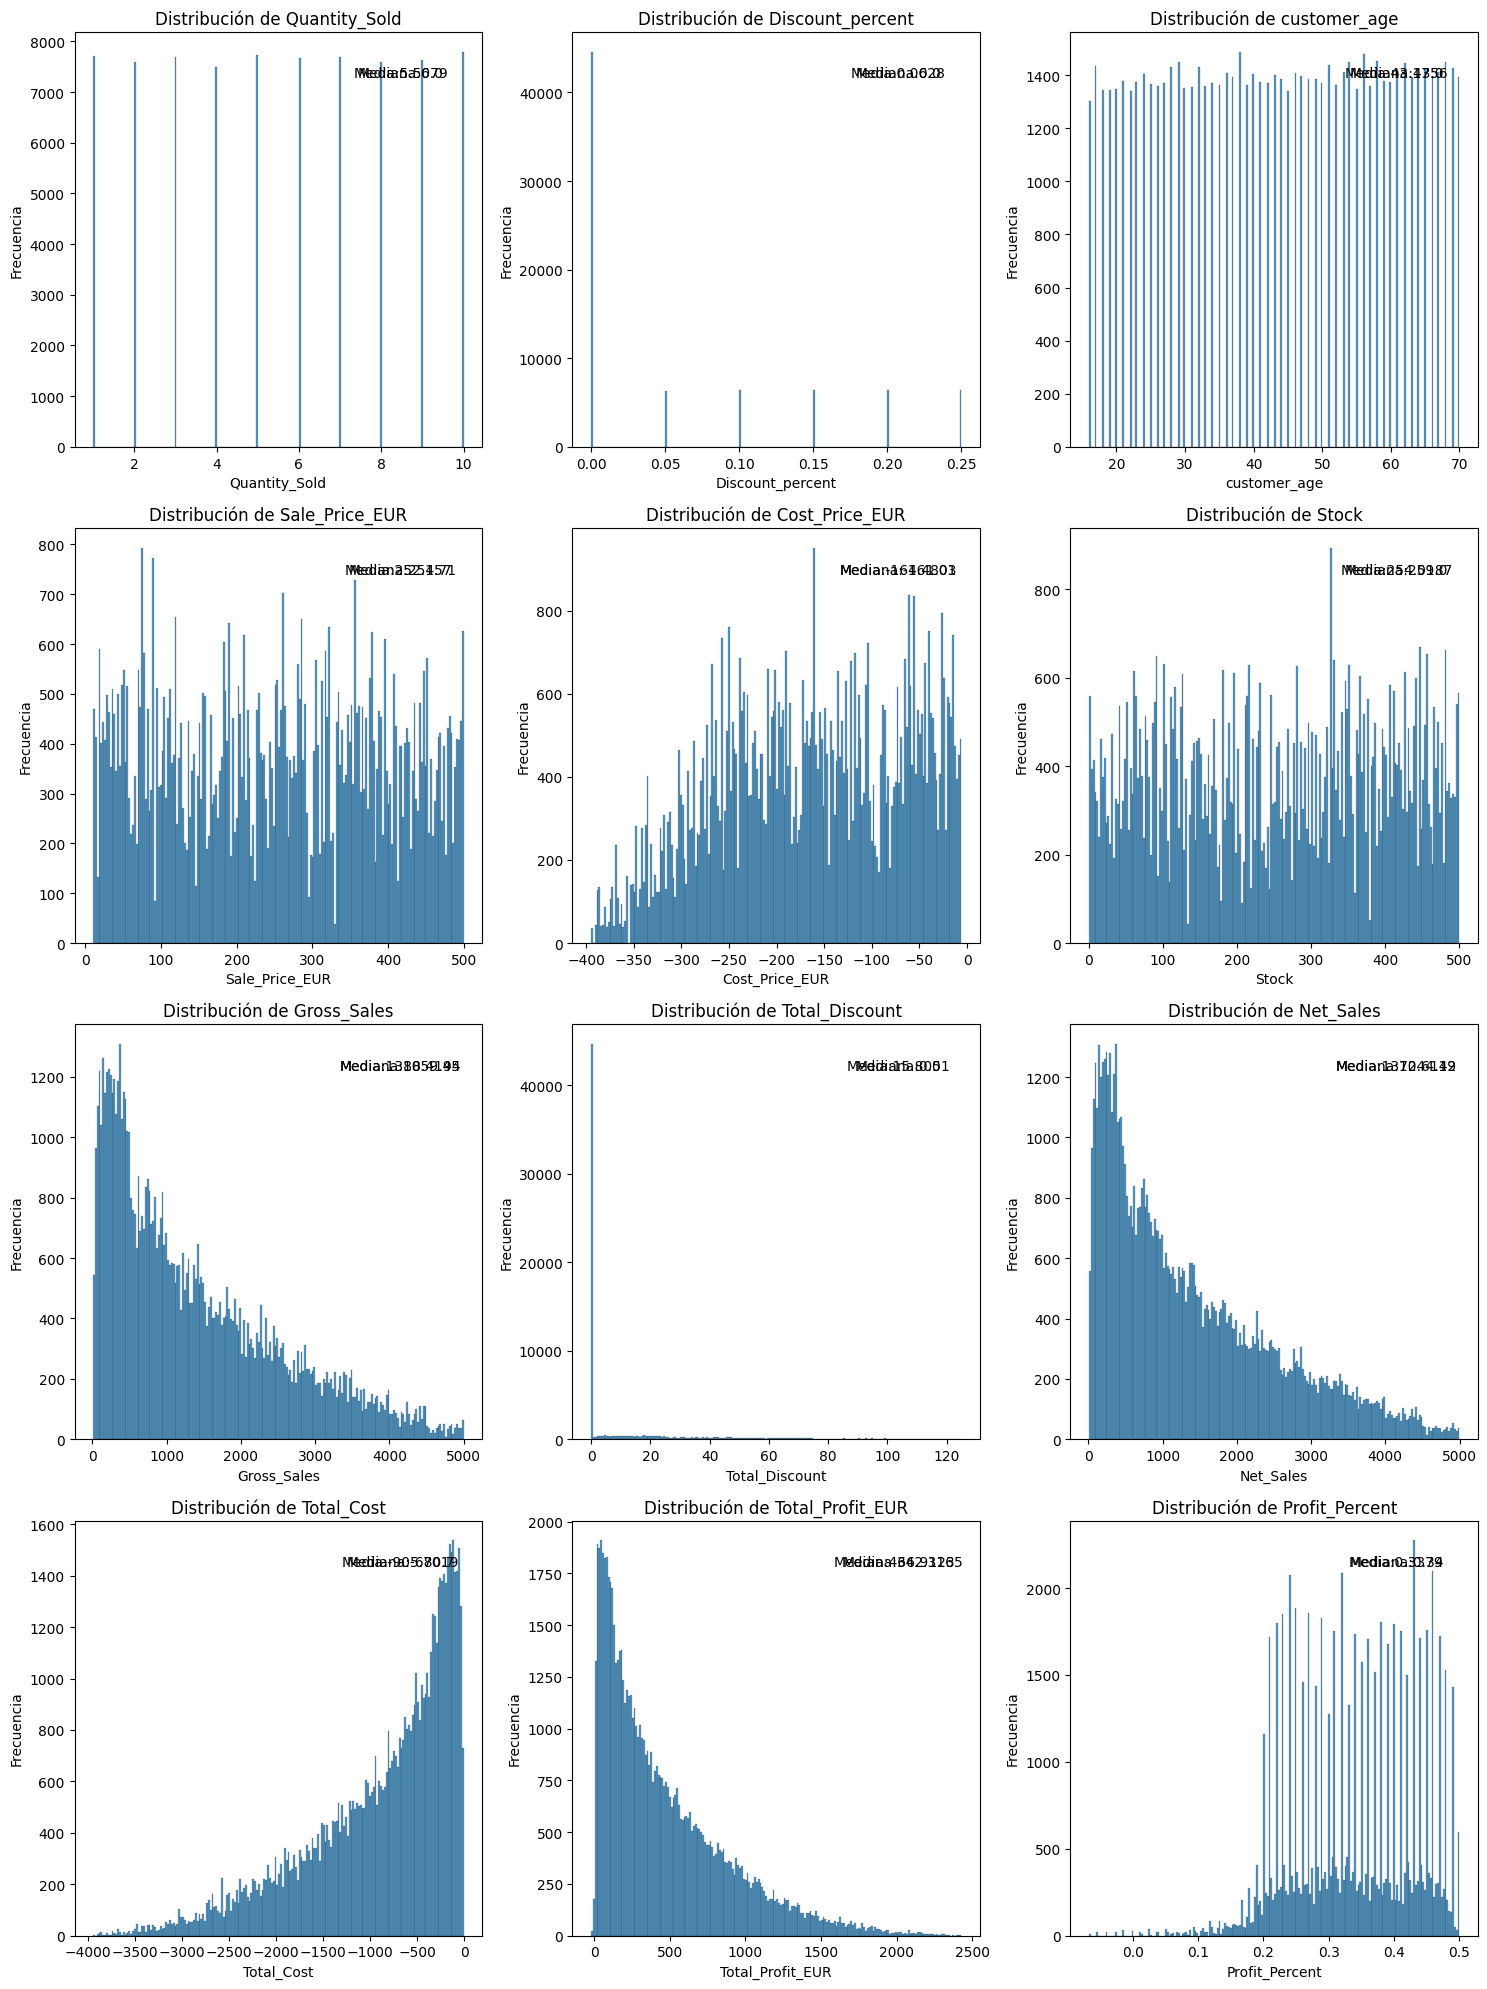

In [7]:
num_graph = len(columnas_num)

num_rows = (num_graph + 2) // 3

fig, axes = plt.subplots(num_rows, 3, figsize=(15,num_rows*5))
axes = axes.flatten()

for i, col in enumerate(columnas_num):
    sns.histplot(data=df_num, x=col, ax = axes [i], bins=200)
    axes[i].text(0.8,0.9, f"Media:{round(df_num[col].mean(),4)}", horizontalalignment="center", verticalalignment="center", transform=axes[i].transAxes)
    axes[i].text(0.8,0.9, f"Mediana:{round(df_num[col].median(),4)}", horizontalalignment="center", verticalalignment="center", transform=axes[i].transAxes)
    axes[i].set_title(f"Distribución de {col}")
    axes[i].set_ylabel("Frecuencia")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

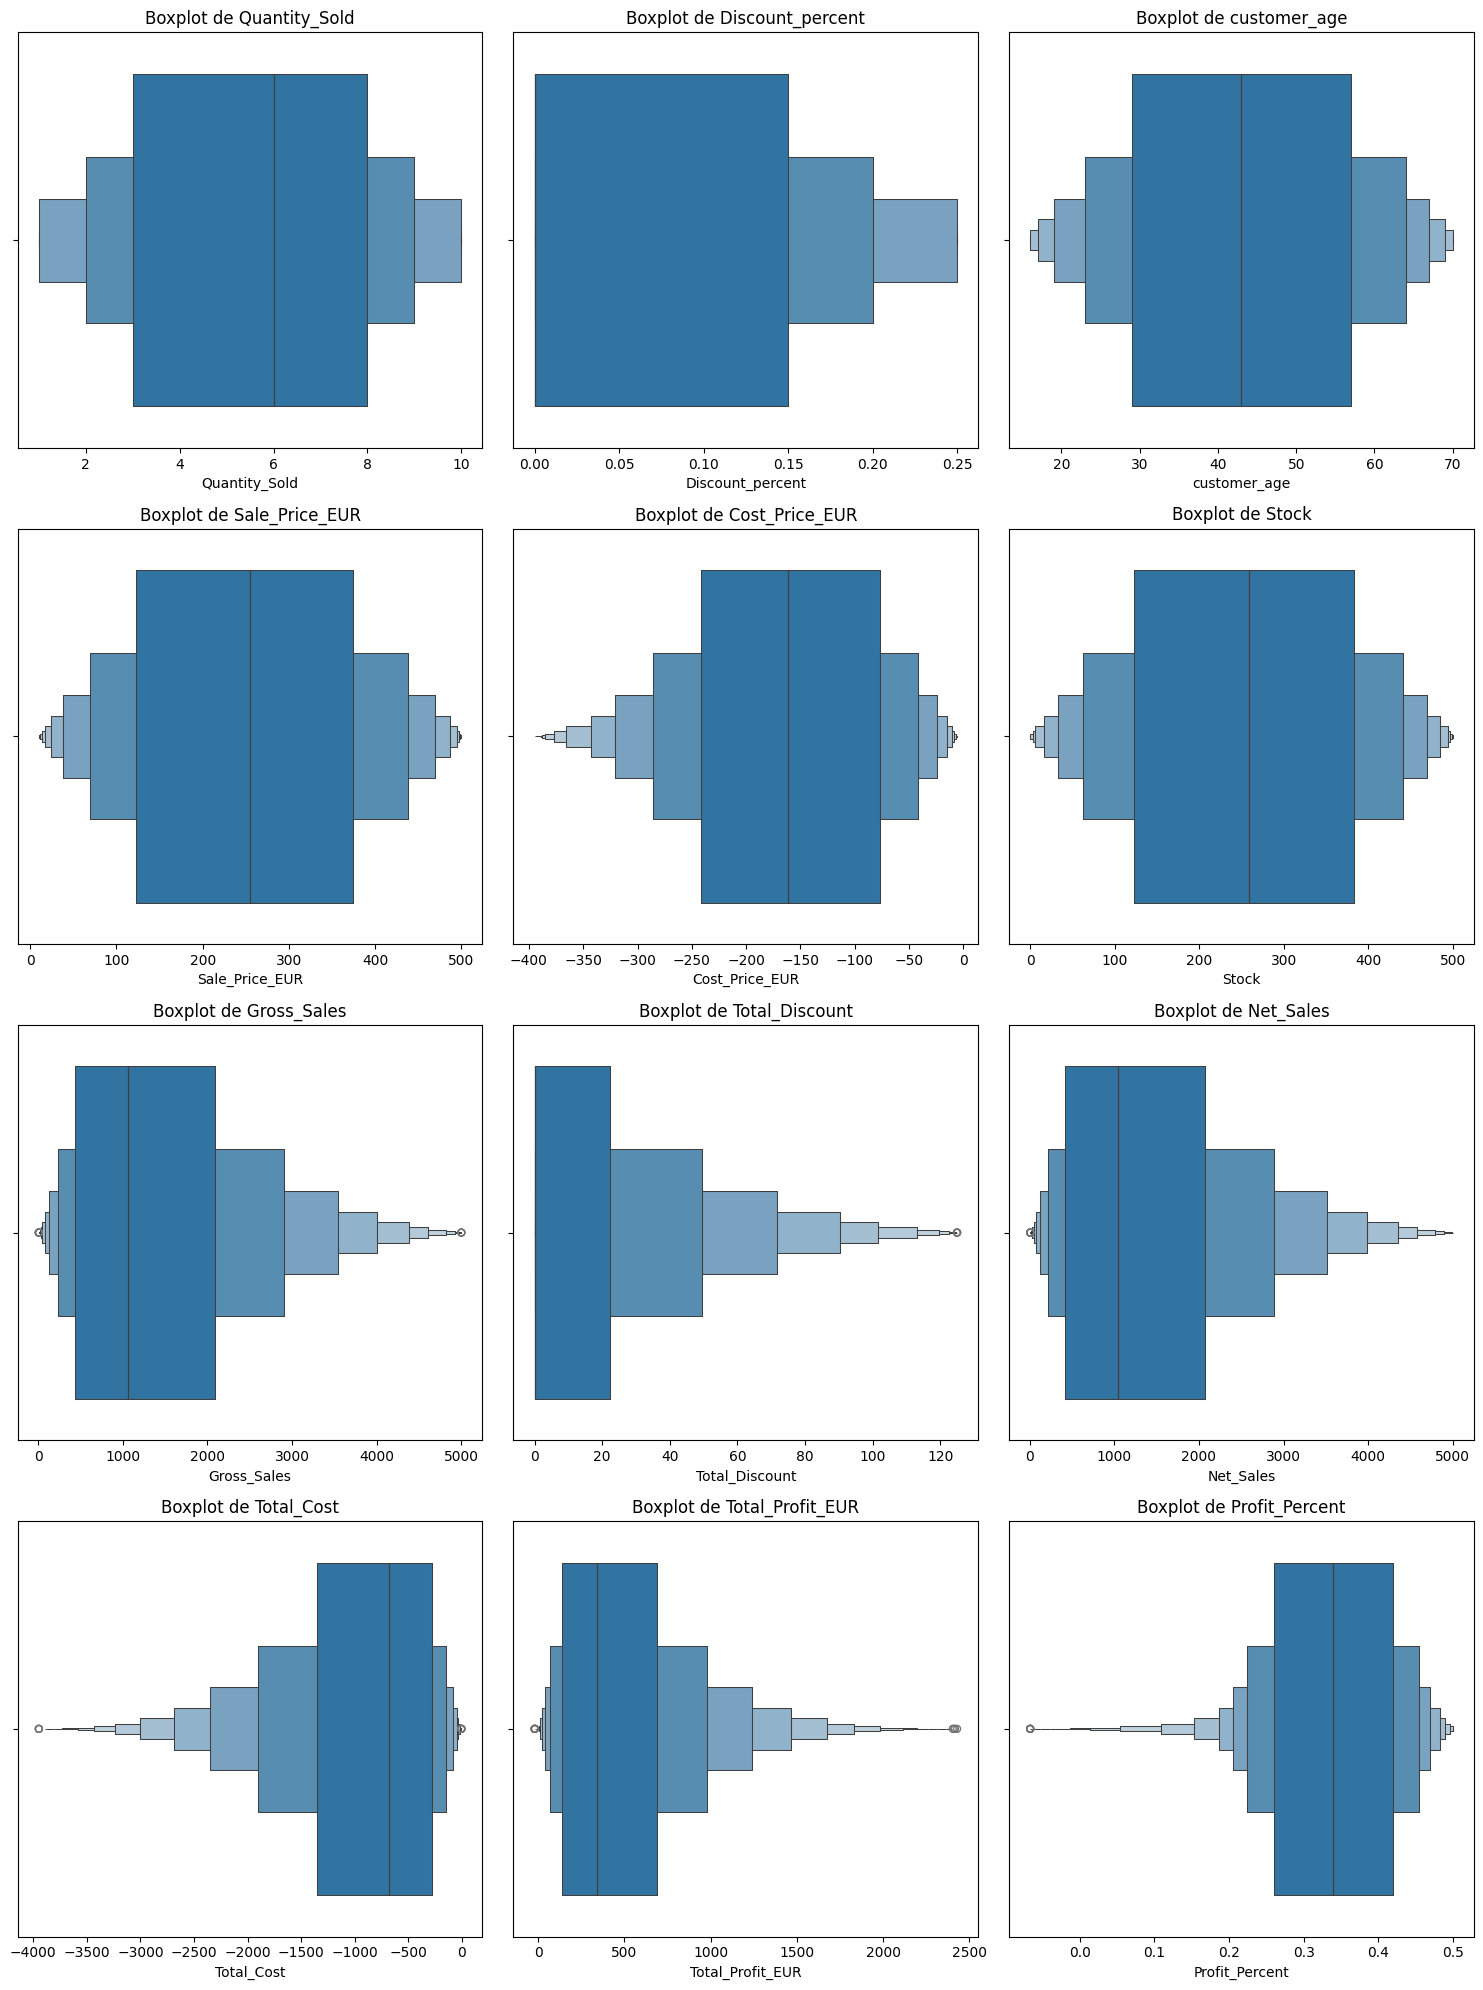

In [8]:
num_graph = len(columnas_num)

num_rows = (num_graph + 2) // 3

fig, axes = plt.subplots(num_rows, 3, figsize=(15,num_rows*5))
axes = axes.flatten()

for i, col in enumerate(columnas_num):
    sns.boxenplot(data=df_num, x=col, ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()